In [ ]:
import numpy as np 
import pandas as pd
import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

/kaggle/input/demand-forecasting/test_nfaJ3J5.csv
/kaggle/input/demand-forecasting/sample_submission_pzljTaX.csv
/kaggle/input/demand-forecasting/train_0irEZ2H.csv


In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import sklearn

In [ ]:
train = pd.read_csv('/kaggle/input/demand-forecasting/train_0irEZ2H.csv')
test = pd.read_csv('/kaggle/input/demand-forecasting/test_nfaJ3J5.csv')
submit = pd.read_csv('/kaggle/input/demand-forecasting/sample_submission_pzljTaX.csv')
train.head()

,record_ID,week,store_id,sku_id,total_price,base_price,is_featured_sku,is_display_sku,units_sold
0,1,17/01/11,8091,216418,99.0375,111.8625,0,0,20
1,2,17/01/11,8091,216419,99.0375,99.0375,0,0,28
2,3,17/01/11,8091,216425,133.9500,133.9500,0,0,19
3,4,17/01/11,8091,216233,133.9500,133.9500,0,0,44
4,5,17/01/11,8091,217390,141.0750,141.0750,0,0,52


In [ ]:
from sklearn.metrics import mean_squared_error
def RMSLE(actual, predicted):

    error = mean_squared_error(actual,predicted)
    
    return error

In [ ]:
train.isna().sum()

record_ID          0
week               0
store_id           0
sku_id             0
total_price        1
base_price         0
is_featured_sku    0
is_display_sku     0
units_sold         0
dtype: int64

In [ ]:
temp = train[train['total_price'].isnull()]['base_price']
train.total_price = train.total_price.fillna(temp)

In [ ]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150150 entries, 0 to 150149
Data columns (total 9 columns):
 #   Column           Non-Null Count   Dtype  
---  ------           --------------   -----  
 0   record_ID        150150 non-null  int64  
 1   week             150150 non-null  object 
 2   store_id         150150 non-null  int64  
 3   sku_id           150150 non-null  int64  
 4   total_price      150150 non-null  float64
 5   base_price       150150 non-null  float64
 6   is_featured_sku  150150 non-null  int64  
 7   is_display_sku   150150 non-null  int64  
 8   units_sold       150150 non-null  int64  
dtypes: float64(2), int64(6), object(1)
memory usage: 10.3+ MB


In [ ]:
train.describe()

,record_ID,store_id,sku_id,total_price,base_price,is_featured_sku,is_display_sku,units_sold
count,150150.000000,150150.000000,150150.000000,150150.000000,150150.000000,150150.000000,150150.000000,150150.000000
mean,106271.555504,9199.422511,254761.132468,206.628502,219.425927,0.095611,0.133200,51.674206
std,61386.037861,615.591445,85547.306447,103.310400,110.961712,0.294058,0.339792,60.207904
min,1.000000,8023.000000,216233.000000,41.325000,61.275000,0.000000,0.000000,1.000000
25%,53111.250000,8562.000000,217217.000000,130.387500,133.237500,0.000000,0.000000,20.000000
50%,106226.500000,9371.000000,222087.000000,198.075000,205.912500,0.000000,0.000000,35.000000
75%,159452.750000,9731.000000,245338.000000,233.700000,234.412500,0.000000,0.000000,62.000000
max,212644.000000,9984.000000,679023.000000,562.162500,562.162500,1.000000,1.000000,2876.000000


In [ ]:
train.store_id.nunique()

76

In [ ]:
train

,record_ID,week,store_id,sku_id,total_price,base_price,is_featured_sku,is_display_sku,units_sold
0,1,17/01/11,8091,216418,99.0375,111.8625,0,0,20
1,2,17/01/11,8091,216419,99.0375,99.0375,0,0,28
2,3,17/01/11,8091,216425,133.9500,133.9500,0,0,19
3,4,17/01/11,8091,216233,133.9500,133.9500,0,0,44
4,5,17/01/11,8091,217390,141.0750,141.0750,0,0,52
...,...,...,...,...,...,...,...,...,...
150145,212638,09/07/13,9984,223245,235.8375,235.8375,0,0,38
150146,212639,09/07/13,9984,223153,235.8375,235.8375,0,0,30
150147,212642,09/07/13,9984,245338,357.6750,483.7875,1,1,31
150148,212643,09/07/13,9984,547934,141.7875,191.6625,0,1,12


In [ ]:
train['diff'] = train['base_price'] - train['total_price']
train['percent_per_base'] = train['diff'] / train['base_price']
train['percent_per_total'] = train['diff'] / train['total_price']

In [ ]:
test['diff'] = test['base_price'] - test['total_price']
test['percent_per_base'] = test['diff'] / test['base_price']
test['percent_per_total'] = test['diff'] / test['total_price']

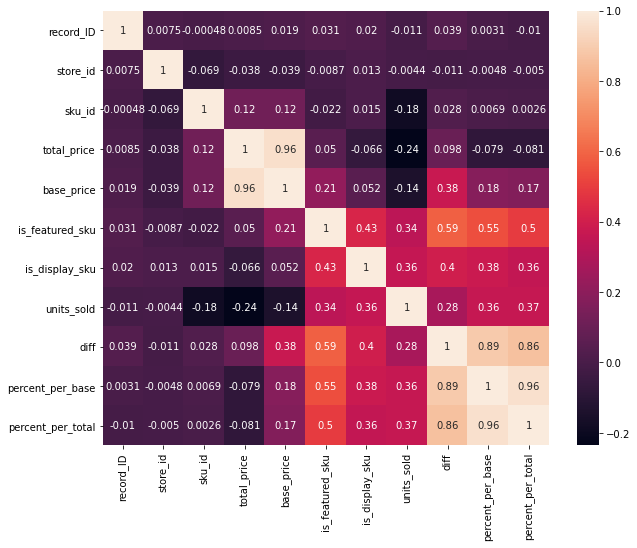

In [ ]:
plt.figure(figsize=(10,8))
sns.heatmap(train.corr(),annot=True)

In [ ]:
test['units_sold']= -1
data = train.append(test, ignore_index = True)

In [ ]:
data

,record_ID,week,store_id,sku_id,total_price,base_price,is_featured_sku,is_display_sku,units_sold,diff,percent_per_base,percent_per_total
0,1,17/01/11,8091,216418,99.0375,111.8625,0,0,20,12.8250,0.114650,0.129496
1,2,17/01/11,8091,216419,99.0375,99.0375,0,0,28,0.0000,0.000000,0.000000
2,3,17/01/11,8091,216425,133.9500,133.9500,0,0,19,0.0000,0.000000,0.000000
3,4,17/01/11,8091,216233,133.9500,133.9500,0,0,44,0.0000,0.000000,0.000000
4,5,17/01/11,8091,217390,141.0750,141.0750,0,0,52,0.0000,0.000000,0.000000
...,...,...,...,...,...,...,...,...,...,...,...,...
164005,232281,01/10/13,9984,223245,241.5375,241.5375,0,0,-1,0.0000,0.000000,0.000000
164006,232282,01/10/13,9984,223153,240.8250,240.8250,0,0,-1,0.0000,0.000000,0.000000
164007,232285,01/10/13,9984,245338,382.6125,401.8500,1,1,-1,19.2375,0.047872,0.050279
164008,232286,01/10/13,9984,547934,191.6625,191.6625,0,0,-1,0.0000,0.000000,0.000000


In [ ]:
cols = ['base_price', 'total_price', 'is_featured_sku', 'is_display_sku','diff','percent_per_base','percent_per_total']

In [ ]:
from sklearn.model_selection import train_test_split

X = train[cols]
y = train['units_sold'] 

Xtrain, Xval, ytrain, yval = train_test_split(X, y, test_size = 0.2, random_state = 1)
print(Xtrain.shape, ytrain.shape, Xval.shape, yval.shape)

(120120, 7) (120120,) (30030, 7) (30030,)


In [ ]:
from sklearn.model_selection import train_test_split
Xtrain, Xval, ytrain, yval = train_test_split(x, y, test_size = 0.2, random_state = 1)
print(Xtrain.shape, ytrain.shape, Xval.shape, yval.shape)

(120120, 7) (120120,) (30030, 7) (30030,)


In [ ]:
Xtrain.isnull().sum()

base_price           0
total_price          0
is_featured_sku      0
is_display_sku       0
diff                 0
percent_per_base     0
percent_per_total    0
dtype: int64

In [ ]:
from sklearn.ensemble import RandomForestRegressor
reg = RandomForestRegressor()
reg.fit(Xtrain, ytrain)

RandomForestRegressor()

In [ ]:
preds = reg.predict(Xval)
print(f'The validation RMSLE error for baseline model is: {RMSLE(yval, preds)}')

The validation RMSLE error for baseline model is: 1923.9109821948434


In [ ]:
sub_preds = reg.predict(test[cols])
submit['units_sold'] = sub_preds
submit.head()

,record_ID,units_sold
0,212645,80.175662
1,212646,73.259578
2,212647,47.114560
3,212648,47.114560
4,212649,62.346705


In [ ]:
submit.to_csv('sub_baseline_v0.csv', index = False)